# Миронова Елена, РИМ-181226
## Математическая морфология
Используя операция математической морфологии:
1. Найти внутренние и внешние границы изображений 1 – 3 (шум удалить).
2. Удалить шум с изображений 4-6.
3. Убрать шум с капч 7-9. 
4. Определить возраст дерева по спилу.

### 1. Поиск внутренних и внешних границ изображений 1 – 3 (удаление шума)

In [10]:
import numpy as np
from skimage.io import imread, imshow
from skimage.morphology import (closing, opening, binary_closing, binary_opening,binary_erosion, binary_dilation, erosion, dilation, diamond, disk, rectangle, square, star)
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
import matplotlib.pyplot as plt
from skimage import data
from sklearn.datasets import load_digits
from skimage import img_as_float, img_as_ubyte
from skimage.filters import rank
%matplotlib inline

In [11]:
img1 = imread('1.png', 1)
img2 = imread('2.png', 1)
img3 = imread('3.png', 1)

In [67]:
def plot_p(img1, img2, img3, img4, title1, title2, title3, title4):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), sharex=True, sharey=True)
    ax1.imshow(img1, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(img2, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title(title2)

    ax3.imshow(img3, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title(title3)
    
    ax4.imshow(img4, cmap=plt.cm.gray)
    ax4.axis('off')
    ax4.set_title(title4)

    fig.tight_layout()

    plt.show()

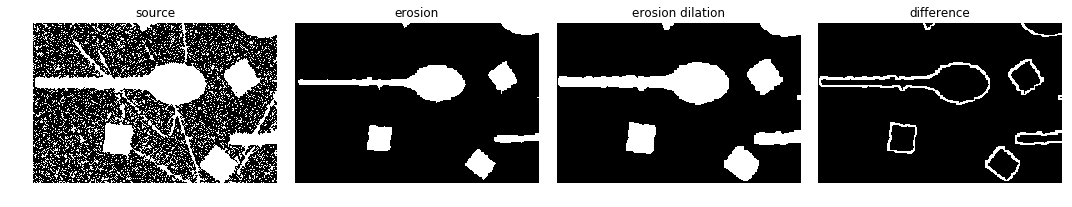

In [21]:
img1_er = erosion(img1, rectangle(6,6))
img1_er_dil = dilation(img1_er, rectangle(6,6))
img1_clean = img1_er_dil - img1_er
plot_p(img1, img1_er, img1_er_dil, img1_clean, \
      'source', 'erosion', 'erosion dilation', 'difference')

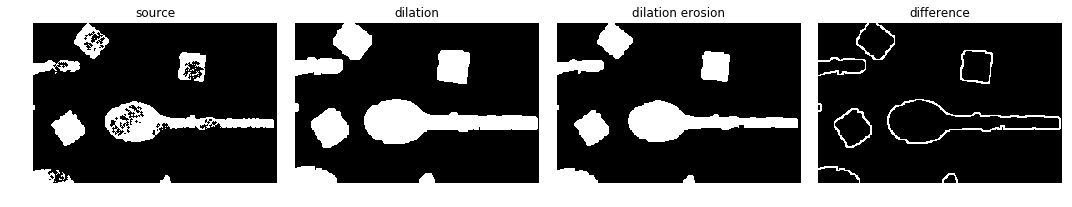

In [22]:
img2_dil = dilation(img2, rectangle(6,6))
img2_dil_er = erosion(img2_dil, rectangle(5,5))
img2_clean = img2_dil - img2_dil_er
plot_p(img2, img2_dil, img2_dil_er, img2_clean, \
      'source', 'dilation', 'dilation erosion', 'difference')

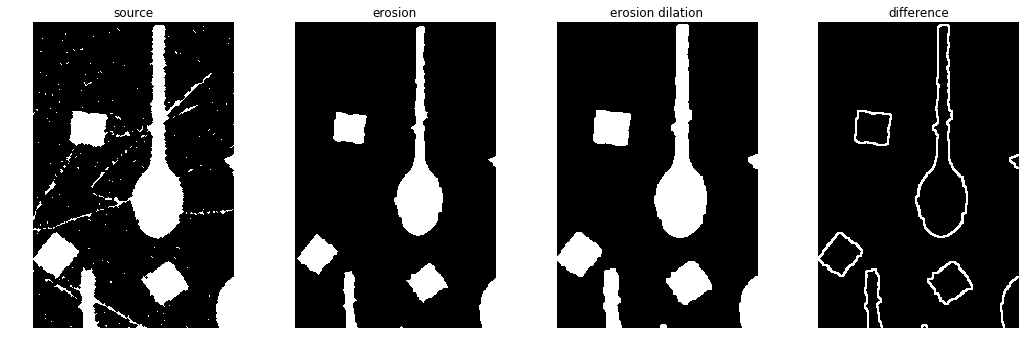

In [24]:
img3_er = erosion(img3, rectangle(4,4))
img3_er_dil = dilation(img3_er, rectangle(5,5))
img3_clean = img3_er_dil - img3_er
plot_p(img3, img3_er, img3_er_dil, img3_clean, \
      'source', 'erosion', 'erosion dilation', 'difference')

### 2. Удаление шума с изображений 4-6.

In [26]:
img4 = imread('4.png', 1)
img5 = imread('5.png', 1)
img6 = imread('6.jpg', 1)

In [29]:
def plot_p3(img1, img2, img3, title1, title2, title3):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True)
    ax1.imshow(img1, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(img2, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title(title2)

    ax3.imshow(img3, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title(title3)
    fig.tight_layout()

    plt.show()

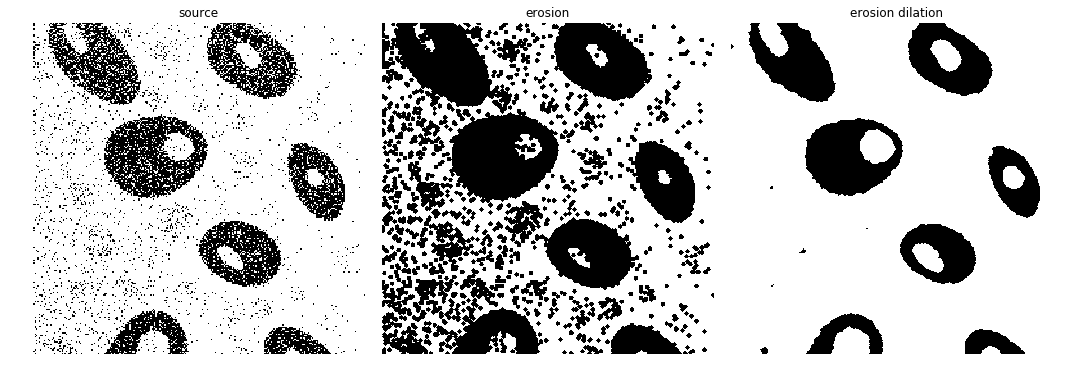

In [35]:
img4_er = erosion(img4, disk(3))
img4_er_dil =  dilation(img4_er, disk(8))
plot_p3(img4, img4_er, img4_er_dil, 'source', 'erosion', 'erosion dilation')

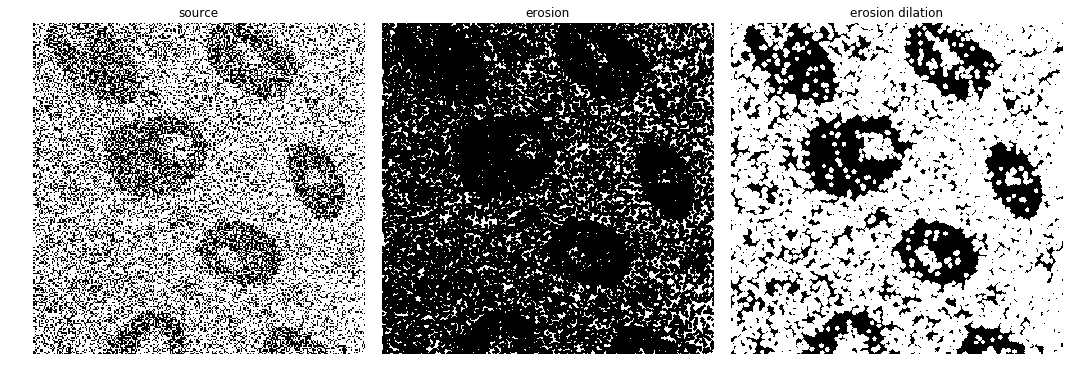

In [42]:
img5_er = erosion(img5, disk(2))
img5_er_dil =  dilation(img5_er, disk(4)) # максимально хороший результат, видны ядра внутри черных тел
plot_p3(img5, img5_er, img5_er_dil, 'source', 'erosion', 'erosion dilation')

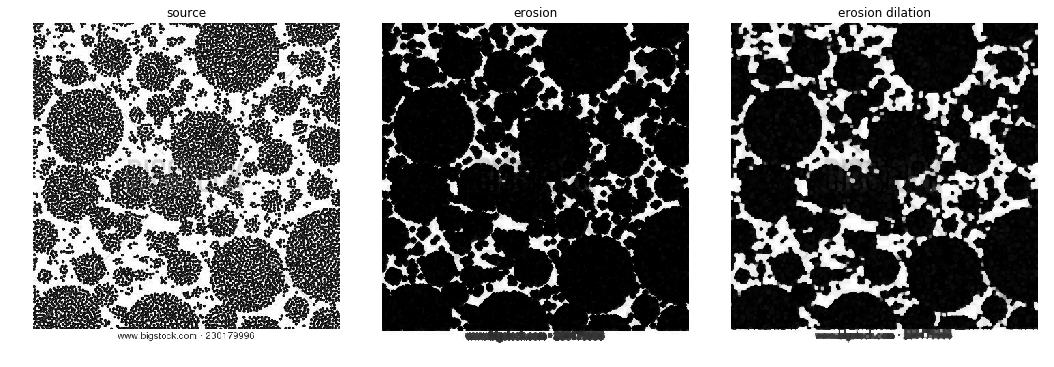

In [43]:
img6_er = erosion(img6, disk(3))
img6_er_dil =  dilation(img6_er, rectangle(4,4))
plot_p3(img6, img6_er, img6_er_dil, 'source', 'erosion', 'erosion dilation')

### 3. Удаление шума с капч 7-9.

In [75]:
img7 = imread('7.png', 1)
img8 = imread('8.png', 1)
img9 = imread('9.png', 1)

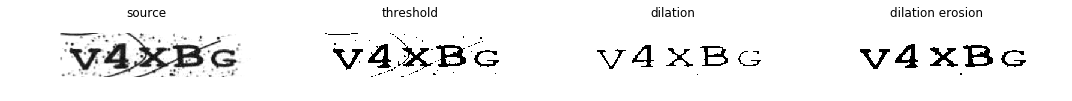

In [76]:
img7 = img7[110:200, 100:500]
img7_tres = img7 > 0.6 
img7_dil = dilation(img7_tres, rectangle(3,3))
img7_dil_er = erosion(img7_dil, rectangle(3,3))
plot_p(img7, img7_tres, img7_dil, img7_dil_er, \
      'source', 'threshold','dilation', 'dilation erosion')

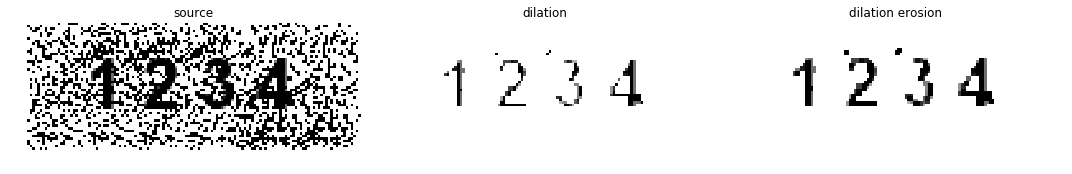

In [77]:
img8_dilation = dilation(img8, rectangle(3,3))
img8_clean = erosion(img8_dilation, rectangle(2,2))
plot_p3(img8, img8_dilation, img8_clean, 'source', 'dilation', 'dilation erosion')

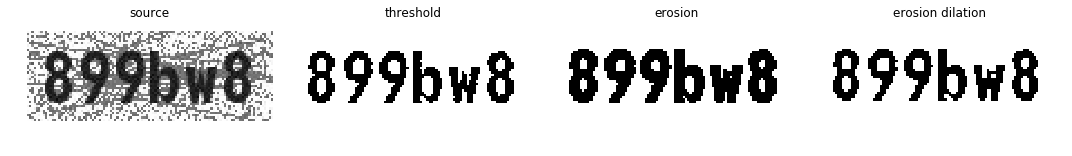

In [78]:
img9 = img9[1:50, 10:120]
img9_tres = img9 > 0.3
img9_erosion = erosion(img9_tres, rectangle(2,2))
img9_erosion_dilation = dilation(img9_erosion, rectangle(2,2))
plot_p(img9, img9_tres, img9_erosion, img9_erosion_dilation, \
      'source', 'threshold','erosion', 'erosion dilation')

### 4. Определение возраста дерева по спилу.

In [79]:
img11 = imread('11.jpg', 1)
img11_cut = img11[1610:1650, 285:1490]
img11_cut = img_as_ubyte(img11_cut)

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


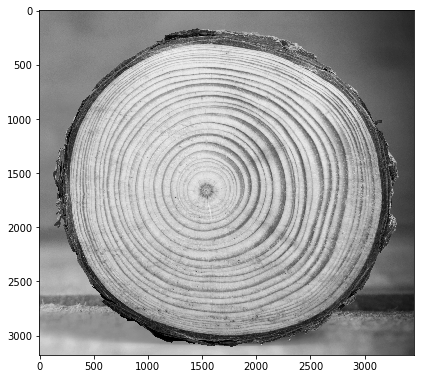

In [86]:
plt.figure(figsize=(6,6))
imshow(img11)
plt.show()

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


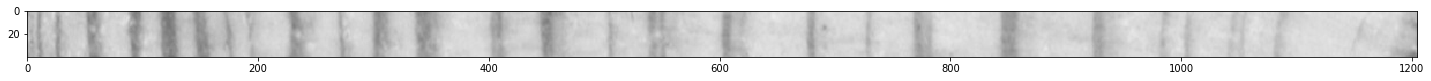

In [87]:
plt.figure(figsize=(20,20))
imshow(img11_cut)
plt.show()

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


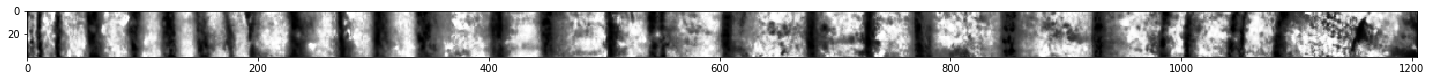

In [88]:
img11_cut = rank.equalize(img11_cut, selem=disk(30))
plt.figure(figsize=(20,20))
imshow(img11_cut)
plt.show()

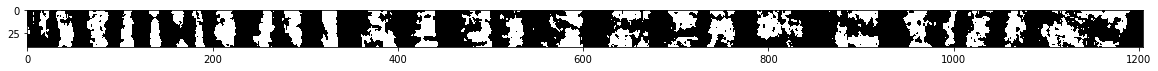

In [89]:
img11_cut = img_as_float(img11_cut>173)
plt.figure(figsize=(20,20))
plt.gray()
plt.imshow(img11_cut)
plt.show()

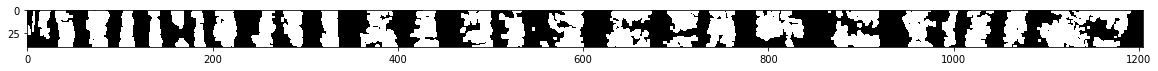

In [90]:
img11_cut = dilation(img11_cut, square(3))
plt.figure(figsize=(20,20))
plt.imshow(img11_cut)
plt.show()

In [92]:
rows, cols = img11_cut.shape
line = np.mean(img11_cut, axis = 0)
img11_cut = np.array([line]*40)

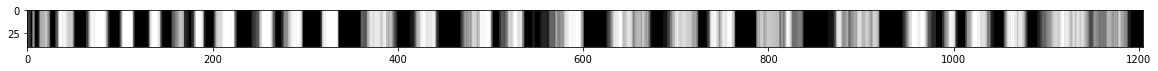

In [93]:
plt.figure(figsize=(20,20))
plt.imshow(img11_cut)
plt.show()

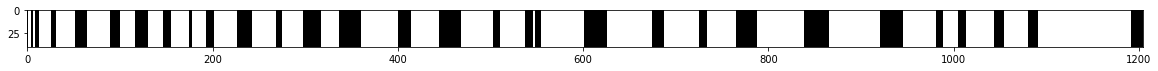

In [94]:
img11_cut = img_as_float(binary_erosion(img11_cut, square(2)))
plt.figure(figsize=(20,20))
plt.imshow(img11_cut)
plt.show()

In [95]:
def count_series(X):
    threshold = 0.5
    line = []
    for i in X:
        if i > threshold:
            line.append(1)
        else:
            line.append(0)
    qcnt = 0
    tau = 0
    cnt1 = 0
    v = 0
    for i in range(cols - 1):
        if line[i] == line[i+1]:
            cnt1 += 1
        else:
            cnt1 = 0
            v +=1
        if cnt1 > tau:
            tau = cnt1

    print("Возраст дерева (количество серий): ", (v-3)//2)
    print("Максимальная ширина серии ", tau)

In [96]:
count_series(line)

Возраст дерева (количество серий):  32
Максимальная ширина серии  47


In [97]:
img11 = imread('11.jpg', 1)
img11[1610:1650, 285:1490] = img11_cut

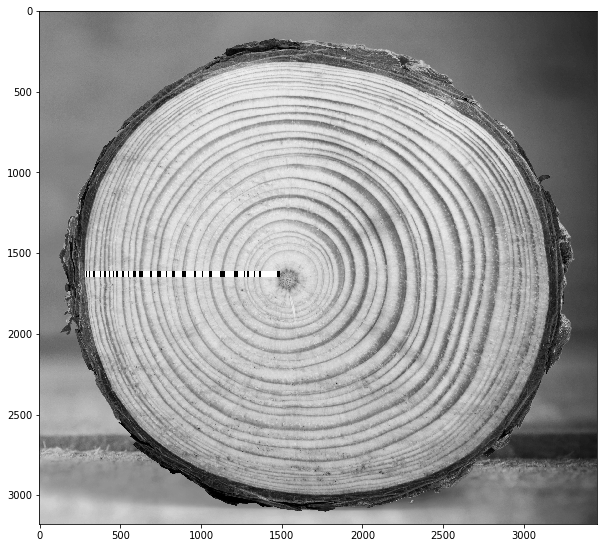

In [102]:
plt.figure(figsize=(10,10))
plt.imshow(img11)
plt.show()